# To Numeric, Dummification, and LotFrontage Imputation Process

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.feature_selection import chi2, f_regression, f_classif, mutual_info_classif, mutual_info_regression 
from sklearn.feature_selection import SelectKBest, SelectFromModel, VarianceThreshold
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from sklearn import neighbors
from sklearn import ensemble
from sklearn import model_selection as ms
sklearn.set_config(print_changed_only=False)

from matplotlib import pyplot as plt

from ipynb.fs.full.functions_sheet import col_obj_list, nan_col_list, cols_nan_unique, nan_col_obj_list_fillna, fill_masvnrtype

In [2]:
hp = pd.read_csv('../hp_for_dummies.csv')

hp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrModified
0,1,60,RL,65.0,8450,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,DNE,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,DNE,DNE,DNE,0,2,2008,WD,Normal,2003
1,2,20,RL,80.0,9600,Pave,DNE,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,DNE,DNE,DNE,0,5,2007,WD,Normal,1976
2,3,60,RL,68.0,11250,Pave,DNE,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,DNE,DNE,DNE,0,9,2008,WD,Normal,2001
3,4,70,RL,60.0,9550,Pave,DNE,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,DNE,DNE,DNE,0,2,2006,WD,Abnorml,1915
4,5,60,RL,84.0,14260,Pave,DNE,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,DNE,DNE,DNE,0,12,2008,WD,Normal,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,DNE,DNE,DNE,0,8,2007,WD,Normal,1999
1456,1457,20,RL,85.0,13175,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,DNE,MnPrv,DNE,0,2,2010,WD,Normal,1978
1457,1458,70,RL,66.0,9042,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,DNE,GdPrv,Shed,2500,5,2010,WD,Normal,1941
1458,1459,20,RL,68.0,9717,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,Fu

In [3]:
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrModified
0,1,60,RL,65.0,8450,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,DNE,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,DNE,DNE,DNE,0,2,2008,WD,Normal,2003
1,2,20,RL,80.0,9600,Pave,DNE,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,DNE,DNE,DNE,0,5,2007,WD,Normal,1976
2,3,60,RL,68.0,11250,Pave,DNE,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,DNE,DNE,DNE,0,9,2008,WD,Normal,2001
3,4,70,RL,60.0,9550,Pave,DNE,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,DNE,DNE,DNE,0,2,2006,WD,Abnorml,1915
4,5,60,RL,84.0,14260,Pave,DNE,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,DNE,DNE,DNE,0,12,2008,WD,Normal,2000


### Get list of columns that have dtype == object

In [4]:
cols_obj_dum = []
cols_num_dum = []

col_obj_list(hp, hp.columns, cols_obj_dum, cols_num_dum)

In [5]:
cols_obj_dum

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [6]:
cols_num_dum

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'GarageYrModified']

### Create DF of dtype == Object for dummification

In [7]:
hp_obj = hp[cols_obj_dum]
hp_obj

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,DNE,Attchd,RFn,TA,TA,Y,DNE,DNE,DNE,WD,Normal
1,RL,Pave,DNE,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,DNE,DNE,DNE,WD,Normal
2,RL,Pave,DNE,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,DNE,DNE,DNE,WD,Normal
3,RL,Pave,DNE,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,DNE,DNE,DNE,WD,Abnorml
4,RL,Pave,DNE,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,DNE,DNE,DNE,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,DNE,DNE,DNE,WD,Normal
1456,RL,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,DNE,MnPrv,DNE,WD,Normal
1457,RL,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,DNE,GdPrv,Shed,WD,Normal
1458,RL,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,DNE,Attchd,Unf,TA,TA,Y,DNE,DNE,DNE,WD,Normal


In [8]:
hp_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1460 non-null   object
 18  ExterQual      1460 non-null

# For Tree Models

In [9]:
conversion = [
    # MSZoning
    {'A': 1, 'C': 2, 'FV': 3, 'I': 4, 'RH': 5, 'RL': 6, 'RP': 7, 'RM': 8}, 
    
    # Street
    {'Grvl': 1, 'Pave': 2},
    
    # Alley
    {'Grvl': 1, 'Pave': 2, 'DNE': 0},
    
    # LotShape
    {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}, 
    
    # LandContour
    {'Lvl': 1, 'Bnk': 2, 'HLS': 3, 'Low': 4},
    
    # Utilities
    {'AllPub': 1, 'NoSewr': 2, 'NoSeWa': 3, 'ELO': 4},
    
    # LotConfig
    {'Inside': 1, 'Corner': 2, 'CulDSac': 3, 'FR2': 4, 'FR3': 5}, 
    
    # LandSlope
    {'Gtl': 1, 'Mod': 2, 'Sev': 3},
    
    # Neighborhood
    {'Blmngtn': 1, 'Blueste': 2, 'BrDale': 3, 'BrkSide': 4, 'ClearCr': 5, 'CollgCr': 6, 'Crawfor': 7,
     'Edwards': 8, 'Gilbert': 9, 'IDOTRR': 10, 'MeadowV': 11, 'Mitchel': 12, 'NAmes': 13, 'NoRidge': 14,
     'NPkVill': 15, 'NridgHt': 16, 'NWAmes': 17, 'OldTown': 18, 'SWISU': 19, 'Sawyer': 20, 'SawyerW': 21,
     'Somerst': 22, 'StoneBr': 23, 'Timber': 24, 'Veenker': 25},
    
    # Condition1
    {'Artery': 1, 'Feedr': 2, 'Norm': 3, 'RRNn': 4, 'RRAn': 5,
     'PosN': 6, 'PosA': 7, 'RRNe': 8, 'RRAe': 9},
    
    # Condition2
    {'Artery': 1, 'Feedr': 2, 'Norm': 3, 'RRNn': 4, 'RRAn': 5,
     'PosN': 6, 'PosA': 7, 'RRNe': 8, 'RRAe': 9},
    
    # BldgType
    {'1Fam': 1, '2FmCon': 2, 'Duplx': 3, 'TwnhsE': 4, 'TwnhsI': 5},
    
    # HouseStyle
    {'1Story': 1, '1.5Fin': 2, '1.5Unf': 3, '2Story': 4, '2.5Fin': 5, '2.5Unf': 6, 'SFoyer': 7, 'SLvl': 8},
    
    # RoofStyle 
    {'Flat': 1, 'Gable': 2, 'Gambrel': 3, 'Hip': 4, 'Mansard': 5, 'Shed' :6},
    
    # RoofMatl
    {'ClyTile': 1, 'CompShg': 2, 'Membran': 3, 'Metal': 4, 'Roll': 5, 'Tar&Grv': 6, 'WdShake': 7, 'WdShngl': 8},
    
    # Exterior1st
    {'AsbShng': 1, 'AsphShn': 2, 'BrkComm': 3, 'BrkFace': 4, 'CBlock': 5, 'CemntBd': 6, 'HdBoard': 7,
     'ImStucc': 8, 'MetalSd': 9, 'Other': 10, 'Plywood': 11, 'PreCast': 12, 'Stone': 13, 'Stucco': 14,
     'VinylSd': 15, 'Wd Sdng': 16, 'WdShing': 17},
    
    # Exterior2nd
    {'AsbShng': 1, 'AsphShn': 2, 'BrkComm': 3, 'BrkFace': 4, 'CBlock': 5, 'CemntBd': 6, 'HdBoard': 7,
     'ImStucc': 8, 'MetalSd': 9, 'Other': 10, 'Plywood': 11, 'PreCast': 12, 'Stone': 13, 'Stucco': 14,
     'VinylSd': 15, 'Wd Sdng': 16, 'WdShing': 17},
    
    # MasVnrType
    {'BrkCmn': 1, 'BrkFace': 2, 'CBlock': 3, 'None': 4, 'Stone': 5, 'DNE': 0},
    
    # ExterQual
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5},
    
    # ExterCond
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5},
    
    # Foundation
    {'BrkTil': 1, 'CBlock': 2, 'PConc': 3, 'Slab': 4, 'Stone': 5, 'Wood': 6},
    
    # BsmtQual
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'DNE': 0},
    
    # BsmtCond
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'DNE': 0},
    
    # BsmtExposure
    {'Gd': 1, 'Av': 2, 'Mn': 3, 'No': 4,'DNE': 0},
    
    # BsmtFinType1
    {'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'Rec': 4, 'LwQ': 5, 'Unf': 6, 'DNE': 0},
    
    # BsmtFinType2
    {'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'Rec': 4, 'LwQ': 5, 'Unf': 6, 'DNE': 0},
    
    # Heating
    {'Floor': 1, 'GasA': 2, 'GasW': 3, 'Grav': 4, 'OthW': 5, 'Wall': 6},
    
    # HeatingQC
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5},
    
    # CentralAir
    {'N': 0, 'Y': 1},
    
    # Electrical
    {'SBrkr': 1, 'FuseA': 2, 'FuseF': 3, 'FuseP': 4, 'Mix': 5, 'DNE': 0},
    
    # KitchenQual
    {'Ex': 1,'Gd': 2,'TA': 3,'Fa': 4,'Po': 5},
    
    # Functional 
    {'Typ': 1, 'Min1': 2, 'Min2': 3, 'Mod': 4, 'Maj1': 5, 'Maj2': 6, 'Sev': 7, 'Sal': 8}, 
    
    # FireplaceQU
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'DNE': 0},
    
    # GarageType
    {'2Types': 1, 'Attchd': 2, 'Basment': 3, 'BuiltIn': 4, 'CarPort': 5, 'Detchd': 6, 'DNE': 0}, 
    
    # GarageFinish
    {'Fin': 1, 'RFn': 2, 'Unf': 3, 'DNE': 4},
    
    # GarageQual
    {'Ex': 1,'Gd': 2,'TA': 3,'Fa': 4,'Po': 5, 'DNE':0},
    
    # GarageCond
    {'Ex': 1,'Gd': 2,'TA': 3,'Fa': 4,'Po': 5, 'DNE':0},
    
    # PavedDrive
    {'Y': 1, 'P': 2, 'N': 0}, 
    
    # PoolQC
    {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'DNE': 0},
    
    # Fence
    {'GdPrv': 1, 'MnPrv': 2, 'GdWo': 3, 'MnWw': 4, 'DNE': 0},

    # MiscFeature
    {'Elev': 1, 'Gar2': 2, 'Othr': 3, 'Shed': 4, 'TenC': 5, 'DNE': 0},
    
    # SaleType
    {'WD': 1, 'CWD': 2, 'VWD': 3, 'New': 4, 'COD': 5, 'Con': 6, 'ConLw': 7,
     'ConLI': 8, 'ConLD': 9, 'Oth': 10},
    
    # SaleCondition
    {'Normal': 1, 'Abnorml': 2, 'AdjLand': 3, 'Alloca': 4, 'Family': 5, 'Partial': 6}]

In [10]:
hp_tree_noid = hp.copy()

hp_tree_noid = hp_tree_noid.drop(['Id'], axis=1)

hp_tree = hp_tree_noid

hp_tree

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrModified
0,60,RL,65.0,8450,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,DNE,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,DNE,DNE,DNE,0,2,2008,WD,Normal,2003
1,20,RL,80.0,9600,Pave,DNE,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,DNE,DNE,DNE,0,5,2007,WD,Normal,1976
2,60,RL,68.0,11250,Pave,DNE,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,DNE,DNE,DNE,0,9,2008,WD,Normal,2001
3,70,RL,60.0,9550,Pave,DNE,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,DNE,DNE,DNE,0,2,2006,WD,Abnorml,1915
4,60,RL,84.0,14260,Pave,DNE,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,DNE,DNE,DNE,0,12,2008,WD,Normal,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,DNE,DNE,DNE,0,8,2007,WD,Normal,1999
1456,20,RL,85.0,13175,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,DNE,MnPrv,DNE,0,2,2010,WD,Normal,1978
1457,70,RL,66.0,9042,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,DNE,GdPrv,Shed,2500,5,2010,WD,Normal,1941
1458,20,RL,68.0,9717,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Ty

In [11]:
hp_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   MSZoning          1460 non-null   object 
 2   LotFrontage       1201 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   Street            1460 non-null   object 
 5   Alley             1460 non-null   object 
 6   LotShape          1460 non-null   object 
 7   LandContour       1460 non-null   object 
 8   Utilities         1460 non-null   object 
 9   LotConfig         1460 non-null   object 
 10  LandSlope         1460 non-null   object 
 11  Neighborhood      1460 non-null   object 
 12  Condition1        1460 non-null   object 
 13  Condition2        1460 non-null   object 
 14  BldgType          1460 non-null   object 
 15  HouseStyle        1460 non-null   object 
 16  OverallQual       1460 non-null   int64  


In [12]:
for i, x in enumerate(cols_obj_dum):
    hp_tree[x] = hp_tree[x].map(conversion[i])
    
hp_tree

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrModified
0,60,6.0,65.0,8450,2,0,1,1,1,1,1,6,3,3,1.0,4,7,5,2003,2003,2,2,15,15.0,2,196.0,2,3,3,2,3,4,1,706,6,0,150,856,2,1,1,1,856,854,0,1710,1,0,2,1,3,1,2,8,1,0,0,2,2003.0,2,2,548,3,3,1,0,61,0,0,0,0,0,0,0,0,2,2008,1,1,2003
1,20,6.0,80.0,9600,2,0,1,1,1,4,1,25,2,3,1.0,1,6,8,1976,1976,2,2,9,9.0,4,0.0,3,3,2,2,3,1,2,978,6,0,284,1262,2,1,1,1,1262,0,0,1262,0,1,2,0,3,1,3,6,1,1,3,2,1976.0,2,2,460,3,3,1,298,0,0,0,0,0,0,0,0,0,5,2007,1,1,1976
2,60,6.0,68.0,11250,2,0,2,1,1,1,1,6,3,3,1.0,4,7,5,2001,2002,2,2,15,15.0,2,162.0,2,3,3,2,3,3,1,486,6,0,434,920,2,1,1,1,920,866,0,1786,1,0,2,1,3,1,2,6,1,1,3,2,2001.0,2,2,608,3,3,1,0,42,0,0,0,0,0,0,0,0,9,2008,1,1,2001
3,70,6.0,60.0,9550,2,0,2,1,1,2,1,7,3,3,1.0,4,7,5,1915,1970,2,2,16,NaN,4,0.0,3,3,1,3,2,4,2,216,6,0,540,756,2,2,1,1,961,756,0,1717,1,0,1,0,3,1,2,7,1,1,2,6,1998.0,3,3,642,3,3,1,0,35,272,0,0,0,0,0,0,0,2,2006,1,2,1915
4,60,6.0,84.0,14260,2,0,2,1,1,4,1,14,3,3,1.0,4,8,5,2000,2000,2,2,15,15.0,2,350.0,2,3,3,2,3,2,1,655,6,0,490,1145,2,1,1,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,1,1,3,2,2000.0,2,3,836,3,3,1,192,84,0,0,0,0,0,0,0,0,12,2008,1,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6.0,62.0,7917,2,0,1,1,1,1,1,9,3,3,1.0,4,6,5,1999,2000,2,2,15,15.0,4,0.0,3,3,3,2,3,4,6,0,6,0,953,953,2,1,1,1,953,694,0,1647,0,0,2,1,3,1,3,7,1,1,3,2,1999.0,2,2,460,3,3,1,0,40,0,0,0,0,0,0,0,0,8,2007,1,1,1999
1456,20,6.0,85.0,13175,2,0,1,1,1,1,1,17,3,3,1.0,1,6,6,1978,1988,2,2,11,11.0,5,119.0,3,3,2,2,3,4,2,790,4,163,589,1542,2,3,1,1,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,3,2,1978.0,3,2,500,3,3,1,349,0,0,0,0,0,0,2,0,0,2,2010,1,1,1978
1457,70,6.0,66.0,9042,2,0,1,1,1,1,1,7,3,3,1.0,4,7,9,1941,2006,2,2,6,NaN,4,0.0,1,2,5,3,2,4,1,275,6,0,877,1152,2,1,1,1,1188,1152,0,2340,0,0,2,0,4,1,2,9,1,2,2,2,1941.0,2,1,252,3,3,1,0,60,0,0,0,0,0,1,4,2500,5,2010,1,1,1941
1458,20,6.0,68.0,9717,2,0,1,1,1,1,1,13,3,3,1.0,1,5,6,1950,1996,4,2,9,9.0,4,0.0,3,3,2,3,3,3,1,49,4,1029,0,1078,2,2,1,2,1078,0,0,1078,1,0,1,0,2,1,2,5,1,0,0,2,1950.0,3,1,240,3,3,1,366,0,112,0,0,0,0,0,0,0,4,2010,1,1,1950


In [13]:
hp_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   MSZoning          1450 non-null   float64
 2   LotFrontage       1201 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   Street            1460 non-null   int64  
 5   Alley             1460 non-null   int64  
 6   LotShape          1460 non-null   int64  
 7   LandContour       1460 non-null   int64  
 8   Utilities         1460 non-null   int64  
 9   LotConfig         1460 non-null   int64  
 10  LandSlope         1460 non-null   int64  
 11  Neighborhood      1460 non-null   int64  
 12  Condition1        1460 non-null   int64  
 13  Condition2        1460 non-null   int64  
 14  BldgType          1334 non-null   float64
 15  HouseStyle        1460 non-null   int64  
 16  OverallQual       1460 non-null   int64  


In [14]:
hp_tree.columns[hp_tree.isna().any()].tolist()

['MSZoning', 'LotFrontage', 'BldgType', 'Exterior2nd']

In [15]:
for name in hp_tree.columns[hp_tree.isna().any()].tolist():
    print(name)
    print(hp_tree[name].unique())
    print('\n')
    print('#'*50)
    print('\n')

MSZoning
[ 6.  8. nan  3.  5.]


##################################################


LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]


##################################################


BldgType
[ 1. nan  4.]


##################################################


Exterior2nd
[15.  9. nan  7. 11. 16.  4. 14.  1.  8.  2. 13. 10.  5.]


##################################################




In [16]:
print(len(hp_tree['MSZoning'].unique()))
hp_tree['MSZoning'].unique()

5


array([ 6.,  8., nan,  3.,  5.])

In [17]:
print(len(hp['MSZoning'].unique()))
hp['MSZoning'].unique()

5


array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [18]:
list(zip(hp_tree['MSZoning'].unique(), hp['MSZoning'].unique()))

[(6.0, 'RL'), (8.0, 'RM'), (nan, 'C (all)'), (3.0, 'FV'), (5.0, 'RH')]

In [19]:
hp.loc[hp['MSZoning']=='C (all)', 'MSZoning'] = 'C'

hp[hp['MSZoning']=='C']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrModified
30,31,70,C,50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,DNE,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,DNE,MnPrv,DNE,0,7,2008,WD,Normal,1920
88,89,50,C,105.0,8470,Pave,DNE,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,DNE,DNE,0.0,DNE,0,0,DNE,DNE,N,0,0,156,0,0,0,DNE,MnPrv,DNE,0,10,2009,ConLD,Abnorml,1915
93,94,190,C,60.0,7200,Pave,DNE,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,6,1910,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Rec,1046,Unf,0,168,1214,GasW,Ex,N,SBrkr,1260,1031,0,2291,0,1,2,0,4,2,TA,9,Typ,1,Gd,Detchd,1900.0,Unf,2,506,TA,TA,Y,0,0,0,0,99,0,DNE,DNE,DNE,0,11,2007,WD,Normal,1910
495,496,30,C,60.0,7879,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,495,Unf,0,225,720,GasA,TA,N,FuseA,720,0,0,720,0,0,1,0,2,1,TA,4,Typ,0,DNE,DNE,0.0,DNE,0,0,DNE,DNE,N,0,523,115,0,0,0,DNE,GdWo,DNE,0,11,2009,WD,Abnorml,1920
557,558,50,C,60.0,11040,Pave,DNE,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,6,1920,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,637,Unf,0,0,637,GasA,Gd,Y,SBrkr,897,439,0,1336,0,0,1,1,3,1,TA,7,Typ,0,DNE,CarPort,1994.0,Unf,1,570,TA,TA,Y,0,47,120,0,0,0,DNE,DNE,DNE,0,9,2006,COD,Normal,1920
711,712,50,C,66.0,8712,Pave,Pave,Reg,HLS,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,7,1900,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Stone,TA,TA,Mn,Unf,0,Unf,0,859,859,GasA,Gd,Y,SBrkr,859,319,0,1178,0,0,1,0,2,1,TA,7,Typ,0,DNE,Detchd,1964.0,RFn,1,384,TA,TA,N,68,0,98,0,0,0,DNE,DNE,DNE,0,1,2010,WD,Abnorml,1900
812,813,20,C,66.0,8712,Grvl,DNE,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,5,5,1952,1952,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,540,540,GasA,TA,N,FuseA,1044,0,0,1044,0,0,1,0,2,1,Fa,4,Typ,0,DNE,Basment,1952.0,Unf,2,504,TA,TA,N,0,0,0,0,0,0,DNE,DNE,Shed,54,6,2010,WD,Alloca,1952
916,917,20,C,50.0,9000,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,3,1949,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,50,Unf,0,430,480,GasA,TA,N,FuseA,480,0,0,480,1,0,0,0,1,1,TA,4,Typ,0,DNE,Detchd,1958.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,DNE,DNE,DNE,0,10,2006,WD,Abnorml,1949
1061,1062,30,C,120.0,18000,Grvl,DNE,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,DNE,Detchd,1994.0,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,DNE,DNE,Shed,560,8,2008,ConLD,Normal,1935
1279,1280,50,C,60.0,7500,Pave,DNE,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,4,1920,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,698,698,GasA,TA,Y,FuseA,698,430,0,1128,0,0,1

In [20]:
hp_tree['BldgType'].unique()

array([ 1., nan,  4.])

In [21]:
hp['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [22]:
hp.loc[hp['BldgType']=='2fmCon', 'BldgType'] = '2FmCon'
hp.loc[hp['BldgType']=='Duplex', 'BldgType'] = 'Duplx'
hp.loc[hp['BldgType']=='Twnhs', 'BldgType'] = 'TwnhsI'

In [23]:
print(len(hp_tree['Exterior2nd'].unique()))
hp_tree['Exterior2nd'].unique()

14


array([15.,  9., nan,  7., 11., 16.,  4., 14.,  1.,  8.,  2., 13., 10.,
        5.])

In [24]:
print(len(hp['Exterior2nd'].unique()))
hp['Exterior2nd'].unique()

16


array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

In [25]:
hp.loc[hp['Exterior2nd']=='Wd Shng', 'Exterior2nd'] = 'WdShing'
hp.loc[hp['Exterior2nd']=='CmentBd', 'Exterior2nd'] = 'CemntBd'
hp.loc[hp['Exterior2nd']=='Brk Cmn', 'Exterior2nd'] = 'BrkComm'

In [26]:
print(len(hp_tree['GarageQual'].unique()))
hp_tree['GarageQual'].unique()

6


array([3, 4, 2, 0, 1, 5], dtype=int64)

In [27]:
print(len(hp['GarageQual'].unique()))
hp['GarageQual'].unique()

6


array(['TA', 'Fa', 'Gd', 'DNE', 'Ex', 'Po'], dtype=object)

In [28]:
list(zip(hp_tree['GarageQual'].unique(), hp['GarageQual'].unique()))

[(3, 'TA'), (4, 'Fa'), (2, 'Gd'), (0, 'DNE'), (1, 'Ex'), (5, 'Po')]

In [29]:
print(len(hp_tree['GarageQual'].unique()))
hp_tree['GarageQual'].unique()

6


array([3, 4, 2, 0, 1, 5], dtype=int64)

In [30]:
print(len(hp['GarageQual'].unique()))
hp['GarageQual'].unique()

6


array(['TA', 'Fa', 'Gd', 'DNE', 'Ex', 'Po'], dtype=object)

In [31]:
list(zip(hp_tree['GarageQual'].unique(), hp['GarageQual'].unique()))

[(3, 'TA'), (4, 'Fa'), (2, 'Gd'), (0, 'DNE'), (1, 'Ex'), (5, 'Po')]

#### Apply changes

In [32]:
# hp_tree = hp_tree_noid.copy()

# hp_tree

In [33]:
for i, x in enumerate(cols_obj_dum):
    hp_tree[x] = hp[x].map(conversion[i])
    
hp_tree

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrModified
0,60,6,65.0,8450,2,0,1,1,1,1,1,6,3,3,1,4,7,5,2003,2003,2,2,15,15,2,196.0,2,3,3,2,3,4,1,706,6,0,150,856,2,1,1,1,856,854,0,1710,1,0,2,1,3,1,2,8,1,0,0,2,2003.0,2,2,548,3,3,1,0,61,0,0,0,0,0,0,0,0,2,2008,1,1,2003
1,20,6,80.0,9600,2,0,1,1,1,4,1,25,2,3,1,1,6,8,1976,1976,2,2,9,9,4,0.0,3,3,2,2,3,1,2,978,6,0,284,1262,2,1,1,1,1262,0,0,1262,0,1,2,0,3,1,3,6,1,1,3,2,1976.0,2,2,460,3,3,1,298,0,0,0,0,0,0,0,0,0,5,2007,1,1,1976
2,60,6,68.0,11250,2,0,2,1,1,1,1,6,3,3,1,4,7,5,2001,2002,2,2,15,15,2,162.0,2,3,3,2,3,3,1,486,6,0,434,920,2,1,1,1,920,866,0,1786,1,0,2,1,3,1,2,6,1,1,3,2,2001.0,2,2,608,3,3,1,0,42,0,0,0,0,0,0,0,0,9,2008,1,1,2001
3,70,6,60.0,9550,2,0,2,1,1,2,1,7,3,3,1,4,7,5,1915,1970,2,2,16,17,4,0.0,3,3,1,3,2,4,2,216,6,0,540,756,2,2,1,1,961,756,0,1717,1,0,1,0,3,1,2,7,1,1,2,6,1998.0,3,3,642,3,3,1,0,35,272,0,0,0,0,0,0,0,2,2006,1,2,1915
4,60,6,84.0,14260,2,0,2,1,1,4,1,14,3,3,1,4,8,5,2000,2000,2,2,15,15,2,350.0,2,3,3,2,3,2,1,655,6,0,490,1145,2,1,1,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,1,1,3,2,2000.0,2,3,836,3,3,1,192,84,0,0,0,0,0,0,0,0,12,2008,1,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,62.0,7917,2,0,1,1,1,1,1,9,3,3,1,4,6,5,1999,2000,2,2,15,15,4,0.0,3,3,3,2,3,4,6,0,6,0,953,953,2,1,1,1,953,694,0,1647,0,0,2,1,3,1,3,7,1,1,3,2,1999.0,2,2,460,3,3,1,0,40,0,0,0,0,0,0,0,0,8,2007,1,1,1999
1456,20,6,85.0,13175,2,0,1,1,1,1,1,17,3,3,1,1,6,6,1978,1988,2,2,11,11,5,119.0,3,3,2,2,3,4,2,790,4,163,589,1542,2,3,1,1,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,3,2,1978.0,3,2,500,3,3,1,349,0,0,0,0,0,0,2,0,0,2,2010,1,1,1978
1457,70,6,66.0,9042,2,0,1,1,1,1,1,7,3,3,1,4,7,9,1941,2006,2,2,6,6,4,0.0,1,2,5,3,2,4,1,275,6,0,877,1152,2,1,1,1,1188,1152,0,2340,0,0,2,0,4,1,2,9,1,2,2,2,1941.0,2,1,252,3,3,1,0,60,0,0,0,0,0,1,4,2500,5,2010,1,1,1941
1458,20,6,68.0,9717,2,0,1,1,1,1,1,13,3,3,1,1,5,6,1950,1996,4,2,9,9,4,0.0,3,3,2,3,3,3,1,49,4,1029,0,1078,2,2,1,2,1078,0,0,1078,1,0,1,0,2,1,2,5,1,0,0,2,1950.0,3,1,240,3,3,1,366,0,112,0,0,0,0,0,0,0,4,2010,1,1,1950


In [34]:
hp_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   MSZoning          1460 non-null   int64  
 2   LotFrontage       1201 non-null   float64
 3   LotArea           1460 non-null   int64  
 4   Street            1460 non-null   int64  
 5   Alley             1460 non-null   int64  
 6   LotShape          1460 non-null   int64  
 7   LandContour       1460 non-null   int64  
 8   Utilities         1460 non-null   int64  
 9   LotConfig         1460 non-null   int64  
 10  LandSlope         1460 non-null   int64  
 11  Neighborhood      1460 non-null   int64  
 12  Condition1        1460 non-null   int64  
 13  Condition2        1460 non-null   int64  
 14  BldgType          1460 non-null   int64  
 15  HouseStyle        1460 non-null   int64  
 16  OverallQual       1460 non-null   int64  


#### Check if changes held

In [35]:
hp_tree.columns[hp_tree.isna().any()].tolist()

['LotFrontage']

### Separate LotFrontage from the rest of the features

In [36]:
hp_lf = hp[['LotFrontage']]

hp_tree_nolf = hp_tree.drop(['LotFrontage'], axis=1)

In [37]:
lf_isnull = list(hp_lf.loc[hp_lf.LotFrontage.isna()].index)

lf_notnull = list(hp_lf.loc[hp_lf.LotFrontage.notna()].index)

hp_tree_nolf_train = hp_tree_nolf.iloc[lf_notnull]
hp_tree_lf_train = hp_lf.iloc[lf_notnull]

hp_tree_nolf_null = hp_tree_nolf.iloc[lf_isnull]
hp_tree_lf_null = hp_lf.iloc[lf_isnull]

# For Linear Models

### Perform Dummification of hp_obj

In [38]:
hp_obj_dum = pd.get_dummies(hp_obj)
hp_obj_dum

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_DNE,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_DNE,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_DNE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_DNE,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_DNE,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_DNE,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_DNE,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_DNE,GarageType_Detchd,GarageFinish_DNE,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_DNE,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_DNE,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_DNE,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_DNE,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_D

### Get list of columns that have dtype != object

In [39]:
cols_num_dum

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'GarageYrModified']

### Create DF of dtype != Object for standardization

In [40]:
hp_num_dum = hp[cols_num_dum]
hp_num_dum

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrModified
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,2003
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,1976
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,2001
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,1915
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,1999
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,1978
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,1941
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,1950


### Drop Id column

In [41]:
hp_noid_num_dum = hp_num_dum.drop(['Id'], axis=1).copy()
hp_noid_num_dum

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrModified
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,2003
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,1976
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,2001
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,1915
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,1999
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,1978
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,1941
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,1950


In [42]:
hp_nolf_strd = hp_noid_num_dum.drop(['LotFrontage'], axis=1)

In [43]:
hp_nolf_strd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   LotArea           1460 non-null   int64  
 2   OverallQual       1460 non-null   int64  
 3   OverallCond       1460 non-null   int64  
 4   YearBuilt         1460 non-null   int64  
 5   YearRemodAdd      1460 non-null   int64  
 6   MasVnrArea        1460 non-null   float64
 7   BsmtFinSF1        1460 non-null   int64  
 8   BsmtFinSF2        1460 non-null   int64  
 9   BsmtUnfSF         1460 non-null   int64  
 10  TotalBsmtSF       1460 non-null   int64  
 11  1stFlrSF          1460 non-null   int64  
 12  2ndFlrSF          1460 non-null   int64  
 13  LowQualFinSF      1460 non-null   int64  
 14  GrLivArea         1460 non-null   int64  
 15  BsmtFullBath      1460 non-null   int64  
 16  BsmtHalfBath      1460 non-null   int64  


# Standardization Process

In [44]:
from sklearn.preprocessing import StandardScaler

strdscaler = StandardScaler()
standardized = strdscaler.fit_transform(hp_nolf_strd)
hp_num_strd = pd.DataFrame(standardized, columns = hp_nolf_strd.columns)

hp_num_strd

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrModified
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.513191,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.296026,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,1.050994
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.571873,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.236495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.156734
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.324966,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.291616,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.984752
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.571873,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.285002,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-1.863632
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.365741,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.289412,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.951632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.571873,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,-0.120242,0.250402,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,0.287207,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,0.918511
1456,-0.872563,0.266407,-0.071836,0.381743,0.222975,0.151865,0.086916,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,-0.120242,1.061367,1.107810,-0.241061,0.789741,-0.761621,0.163779,-0.211454,0.296763,2.152216,0.240904,0.311725,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,0.222975
1457,0.309859,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.571873,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,-0.120242,1.569647,-0.819964,-0.241061,0.789741,-0.761621,1.390023,-0.211454,1.527656,2.152216,0.159324,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,-1.002492
1458,-0.872563,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.571873,-0.865548,6.092188,-1.284176,0.046905,-0.218982,-0.795163,-0.120242,-0.832788,1.107810,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.934130,-0.951226,0.179168,-1.026858,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,-0.704406


In [45]:
hp_linear_nolf = pd.concat([hp_num_strd, hp_obj_dum], axis=1, sort=False)
hp_linear_nolf

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrModified,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_DNE,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_DNE,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_DNE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_DNE,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_DNE,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_DNE,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_DNE,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_DNE,GarageTy

In [46]:
hp_lin_nolf_train = hp_linear_nolf.iloc[lf_notnull]
hp_lin_lf_train = hp_lf.iloc[lf_notnull]

hp_lin_nolf_null = hp_linear_nolf.iloc[lf_isnull]
hp_lin_lf_null = hp_lf.iloc[lf_isnull]

In [47]:
hp_lin_nolf_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrModified,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_DNE,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_DNE,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_DNE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_DNE,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_DNE,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_DNE,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_DNE,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_DNE,GarageTy

In [48]:
hp_lin_lf_train

,LotFrontage
0,65.0
1,80.0
2,68.0
3,60.0
4,84.0
...,...
1455,62.0
1456,85.0
1457,66.0
1458,68.0


In [49]:
hp_lin_nolf_null

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrModified,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_DNE,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_DNE,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_DNE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_DNE,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_DNE,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_DNE,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_DNE,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_DNE,GarageTy

In [50]:
hp_lin_lf_null

,LotFrontage
7,NaN
12,NaN
14,NaN
16,NaN
24,NaN
...,...
1429,NaN
1431,NaN
1441,NaN
1443,NaN


## Imputation of LotFrontage

### Attempt with Ridge

In [51]:
ridge = Ridge(random_state=0, max_iter=100000)

alphas = np.logspace(-2, 3, 100)

gparam_ridge = [{'alpha': alphas}]
n_folds_lin = ms.StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

gs_ridge = GridSearchCV(ridge, gparam_ridge, cv=n_folds_lin)
%time gs_ridge.fit(hp_lin_nolf_train, hp_lin_lf_train)

print(gs_ridge.best_params_)
print(gs_ridge.best_score_)

C:\Users\tdcho\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Wall time: 9.01 s
{'alpha': 61.35907273413169}
0.47524043831280804


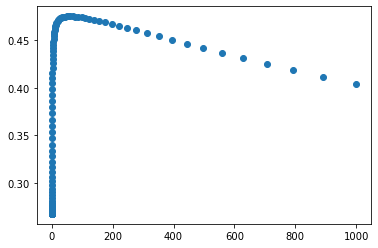

In [52]:
plt.scatter(gs_ridge.cv_results_['param_alpha'], gs_ridge.cv_results_['mean_test_score'])

C:\Users\tdcho\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Wall time: 4.3 s
{'alpha': 59.38775510204081}
0.4752470873330921


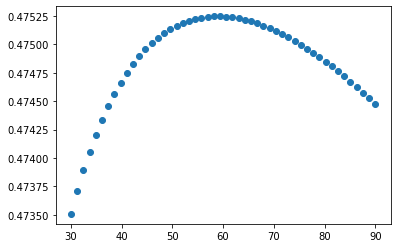

In [53]:
alphas = np.linspace(30, 90, 50)
gparam_ridge = [{'alpha': alphas}]

gs_ridge = GridSearchCV(ridge, gparam_ridge, cv=n_folds_lin)
%time gs_ridge.fit(hp_lin_nolf_train, hp_lin_lf_train)

print(gs_ridge.best_params_)
print(gs_ridge.best_score_)
plt.scatter(gs_ridge.cv_results_['param_alpha'], gs_ridge.cv_results_['mean_test_score'])

### Attempt with Lasso

C:\Users\tdcho\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Wall time: 12.2 s
{'alpha': 0.16297508346206444}
0.47751132429263504


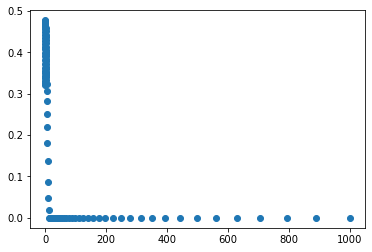

In [54]:
lasso = Lasso(random_state=0, max_iter=100000)

alphas = np.logspace(-2, 3, 100)

gparam_lasso = [{'alpha': alphas}]

gs_lasso = GridSearchCV(lasso, gparam_lasso, cv=n_folds_lin)
%time gs_lasso.fit(hp_lin_nolf_train, hp_lin_lf_train)

print(gs_lasso.best_params_)
print(gs_lasso.best_score_)

plt.scatter(gs_lasso.cv_results_['param_alpha'], gs_lasso.cv_results_['mean_test_score'])

C:\Users\tdcho\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Wall time: 11.1 s
{'alpha': 0.16}
0.4775590716993506


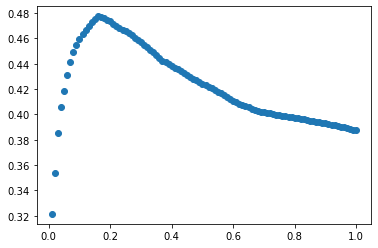

In [55]:
lasso = Lasso(random_state=0, max_iter=100000)

alphas = np.linspace(1e-2, 1, 100)

gparam_lasso = [{'alpha': alphas}]

gs_lasso = GridSearchCV(lasso, gparam_lasso, cv=n_folds_lin)
%time gs_lasso.fit(hp_lin_nolf_train, hp_lin_lf_train)

print(gs_lasso.best_params_)
print(gs_lasso.best_score_)

plt.scatter(gs_lasso.cv_results_['param_alpha'], gs_lasso.cv_results_['mean_test_score'])

### Attempt with Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(random_state=0, loss='ls',
                                min_impurity_decrease=0.1, 
                                warm_start=False)

learningrate = [0.0001, 0.001, 0.01, 0.1, 1] # subsequently, fine tune
nestimators = [5, 10, 50, 100, 200, 500, 1000,
               1500, 2000, 5000]
# subsamples = np.linspace(0, 1, 100)
maxfeatures = [9, 40, len(hp_tree_nolf_train.columns)]
maxdepth = range(1, 5)

ytrain_array = hp_tree_lf_train.values.flatten()

gparam_gbm = [{'learning_rate': learningrate},
              {'n_estimators': nestimators},
#               {'subsample': subsamples}, 
              {'max_features': maxfeatures},
              {'max_depth': maxdepth}]

n_folds=ms.StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1)
%time gs_gbm.fit(hp_tree_nolf_train, hp_tree_lf_train)

C:\Users\tdcho\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\tdcho\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Wall time: 32.3 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.1,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,...
                                                 random_state=0, subsample=1.0,
                                                 tol=0.0001,
                      

In [57]:
print(gs_gbm.best_params_)
print(gs_gbm.best_score_)

gbm_imp_feat = sorted(zip(hp_tree_nolf_train.columns, 
                          gs_gbm.best_estimator_.feature_importances_), key=lambda t:t[1], reverse=True)
gbm_imp_feat

{'max_depth': 2}
0.5295552228709276


[('LotArea', 0.4811440075673954),
 ('1stFlrSF', 0.07786383968009226),
 ('LotConfig', 0.06877175774174776),
 ('BldgType', 0.0685981546119163),
 ('RoofStyle', 0.04612113091481302),
 ('LotShape', 0.03883054231371367),
 ('GrLivArea', 0.036508798842082586),
 ('GarageArea', 0.025827109323144772),
 ('GarageFinish', 0.01644643398596545),
 ('Condition1', 0.014441323161574067),
 ('GarageType', 0.01376593100050361),
 ('BsmtFinSF1', 0.013577605517553295),
 ('PoolQC', 0.011657519712520563),
 ('MSSubClass', 0.010409121211756007),
 ('YearRemodAdd', 0.00991435993006596),
 ('Foundation', 0.00925395533876255),
 ('EnclosedPorch', 0.007672046389732091),
 ('Neighborhood', 0.007325711891577569),
 ('PoolArea', 0.006773948765044243),
 ('YearBuilt', 0.004646910516496256),
 ('BedroomAbvGr', 0.004255676707729441),
 ('BsmtUnfSF', 0.004076472831384814),
 ('GarageYrModified', 0.0037469454653792497),
 ('LandContour', 0.002621144395310114),
 ('MSZoning', 0.0017293101920936669),
 ('Alley', 0.0016666822759366093),
 ('G

In [58]:
gbm_top_important_features = [x[0] for x in gbm_imp_feat if x[1] >= 0.01]

lf_tree_gbm = hp_tree[[*gbm_top_important_features]]
lf_tree_gbm

,LotArea,1stFlrSF,LotConfig,BldgType,RoofStyle,LotShape,GrLivArea,GarageArea,GarageFinish,Condition1,GarageType,BsmtFinSF1,PoolQC,MSSubClass
0,8450,856,1,1,2,1,1710,548,2,3,2,706,0,60
1,9600,1262,4,1,2,1,1262,460,2,2,2,978,0,20
2,11250,920,1,1,2,2,1786,608,2,3,2,486,0,60
3,9550,961,2,1,2,2,1717,642,3,3,6,216,0,70
4,14260,1145,4,1,2,2,2198,836,2,3,2,655,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,953,1,1,2,1,1647,460,2,3,2,0,0,60
1456,13175,2073,1,1,2,1,2073,500,3,3,2,790,0,20
1457,9042,1188,1,1,2,1,2340,252,2,3,2,275,0,70
1458,9717,1078,1,1,4,1,1078,240,3,3,2,49,0,20


In [59]:
lf_tree_gbm_train = lf_tree_gbm.iloc[lf_notnull]

lf_tree_gbm_null = lf_tree_gbm.iloc[lf_isnull]

# hp_tree_lf_train 
# hp_tree_lf_null

In [60]:
lf_tree_gbm_train

,LotArea,1stFlrSF,LotConfig,BldgType,RoofStyle,LotShape,GrLivArea,GarageArea,GarageFinish,Condition1,GarageType,BsmtFinSF1,PoolQC,MSSubClass
0,8450,856,1,1,2,1,1710,548,2,3,2,706,0,60
1,9600,1262,4,1,2,1,1262,460,2,2,2,978,0,20
2,11250,920,1,1,2,2,1786,608,2,3,2,486,0,60
3,9550,961,2,1,2,2,1717,642,3,3,6,216,0,70
4,14260,1145,4,1,2,2,2198,836,2,3,2,655,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,953,1,1,2,1,1647,460,2,3,2,0,0,60
1456,13175,2073,1,1,2,1,2073,500,3,3,2,790,0,20
1457,9042,1188,1,1,2,1,2340,252,2,3,2,275,0,70
1458,9717,1078,1,1,4,1,1078,240,3,3,2,49,0,20


In [61]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(random_state=0, loss='ls',
                                min_impurity_decrease=0.1, 
                                warm_start=False)

learningrate = [0.0001, 0.001, 0.01, 0.1, 1] # subsequently, fine tune
nestimators = [5, 10, 50, 100, 200, 500, 1000,
               1500, 2000, 5000]
# subsamples = np.linspace(0, 1, 100)
maxfeatures = [9, 40, len(lf_tree_gbm_train.columns)]
maxdepth = range(1, 5)

ytrain_array = lf_tree_gbm_train.values.flatten()

gparam_gbm = [{'learning_rate': learningrate},
              {'n_estimators': nestimators},
#               {'subsample': subsamples}, 
              {'max_features': maxfeatures},
              {'max_depth': maxdepth}]

n_folds=ms.StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1)
%time gs_gbm.fit(lf_tree_gbm_train, hp_tree_lf_train)

C:\Users\tdcho\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Wall time: 10.6 s


C:\Users\tdcho\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.1,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,...
                                                 random_state=0, subsample=1.0,
                                                 tol=0.0001,
                      

In [62]:
print(gs_gbm.best_params_)
print(gs_gbm.best_score_)

# gbm_imp_feat = sorted(zip(hp_tree_nolf_train.columns, 
#                           gs_gbm.best_estimator_.feature_importances_), key=lambda t:t[1], reverse=True)
# gbm_imp_feat

{'max_features': 9}
0.5518945298281176


In [63]:
grid_report = pd.DataFrame(gs_gbm.cv_results_)
grid_report.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
mean_fit_time,0.226679,0.236399,0.239399,0.243097,0.231000,0.016301,0.025499,0.117000,0.232002,0.448799,1.102103,2.260496,3.532499,4.124797,5.542101,0.162800,0.006701,0.227300,0.103700,0.163499,0.224902,0.270299
std_fit_time,0.013921,0.019342,0.016698,0.011731,0.005449,0.000928,0.001225,0.003435,0.003034,0.016011,0.017161,0.036685,0.142072,0.095201,0.317035,0.002875,0.001166,0.005409,0.001860,0.000708,0.005087,0.011969
mean_score_time,0.005101,0.005901,0.005802,0.005700,0.005099,0.004400,0.005001,0.006200,0.005198,0.006001,0.007897,0.008701,0.011201,0.011800,0.009300,0.005201,0.000000,0.005299,0.004900,0.004799,0.007097,0.004701
std_score_time,0.000366,0.000583,0.000601,0.000749,0.000375,0.000200,0.000837,0.001750,0.000507,0.000774,0.002559,0.000245,0.000246,0.002159,0.000400,0.000509,0.000000,0.000400,0.000200,0.000244,0.003722,0.000510
param_learning_rate,0.000100,0.001000,0.010000,0.100000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
param_n_estimators,NaN,NaN,NaN,NaN,NaN,5,10,50,100,200,500,1000,1500,2000,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
param_max_features,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,40,14,NaN,NaN,NaN,NaN
param_max_depth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,3,4
params,{'learning_rate': 0.0001},{'learning_rate': 0.001},{'learning_rate': 0.01},{'learning_rate': 0.1},{'learning_rate': 1},{'n_estimators': 5},{'n_estimators': 10},{'n_estimators': 50},{'n_estimators': 100},{'n_estimators': 200},{'n_estimators': 500},{'n_estimators': 1000},{'n_estimators': 1500},{'n_estimators': 2000},{'n_estimators': 5000},{'max_features': 9},{'max_features': 40},{'max_features': 14},{'max_depth': 1},{'max_depth': 2},{'max_depth': 3},{'max_depth': 4}
split0_test_score,0.006150,0.057933,0.300027,0.490477,0.156381,0.216952,0.304876,0.459948,0.490477,0.503611,0.512564,0.511895,0.510124,0.510287,0.510287,0.472750,NaN,0.490477,0.412017,0.450382,0.490477,0.479442


In [64]:
grid_report.sort_values('mean_test_score', ascending=False).head().T

,15,7,20,3,17
mean_fit_time,0.162800,0.117000,0.224902,0.243097,0.227300
std_fit_time,0.002875,0.003435,0.005087,0.011731,0.005409
mean_score_time,0.005201,0.006200,0.007097,0.005700,0.005299
std_score_time,0.000509,0.001750,0.003722,0.000749,0.000400
param_learning_rate,NaN,NaN,NaN,0.100000,NaN
param_n_estimators,NaN,50,NaN,NaN,NaN
param_max_features,9,NaN,NaN,NaN,14
param_max_depth,NaN,NaN,3,NaN,NaN
params,{'max_features': 9},{'n_estimators': 50},{'max_depth': 3},{'learning_rate': 0.1},{'max_features': 14}
split0_test_score,0.472750,0.459948,0.490477,0.490477,0.490477


# The Above Models do not seem to work well

- We will use KNNImputer instead

## KNN Imputer

- Since none of the above seemed to do a good job of imputing the values for 'LotFrontage'

In [65]:
knn = KNNImputer(n_neighbors=3, weights="uniform")
knn_lf = knn.fit_transform(hp_tree[['LotFrontage']])

hp[['LotFrontage']] = knn_lf

hp.isna().values.any()

False

In [66]:
hp_tree[hp_tree['LotFrontage'].isna()]['LotFrontage']

7      NaN
12     NaN
14     NaN
16     NaN
24     NaN
        ..
1429   NaN
1431   NaN
1441   NaN
1443   NaN
1446   NaN
Name: LotFrontage, Length: 259, dtype: float64

In [83]:
hp_tree_fullyimputed = hp_tree.copy()

hp_tree_fullyimputed[['LotFrontage']] = knn_lf

hp_tree_fullyimputed[hp_tree_fullyimputed['LotFrontage'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrModified


# To be used with Tree-base models

In [79]:
hp_tree_fullyimputed = hp_tree

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrModified
0,60,6,65.0,8450,2,0,1,1,1,1,1,6,3,3,1,4,7,5,2003,2003,2,2,15,15,2,196.0,2,3,3,2,3,4,1,706,6,0,150,856,2,1,1,1,856,854,0,1710,1,0,2,1,3,1,2,8,1,0,0,2,2003.0,2,2,548,3,3,1,0,61,0,0,0,0,0,0,0,0,2,2008,1,1,2003
1,20,6,80.0,9600,2,0,1,1,1,4,1,25,2,3,1,1,6,8,1976,1976,2,2,9,9,4,0.0,3,3,2,2,3,1,2,978,6,0,284,1262,2,1,1,1,1262,0,0,1262,0,1,2,0,3,1,3,6,1,1,3,2,1976.0,2,2,460,3,3,1,298,0,0,0,0,0,0,0,0,0,5,2007,1,1,1976
2,60,6,68.0,11250,2,0,2,1,1,1,1,6,3,3,1,4,7,5,2001,2002,2,2,15,15,2,162.0,2,3,3,2,3,3,1,486,6,0,434,920,2,1,1,1,920,866,0,1786,1,0,2,1,3,1,2,6,1,1,3,2,2001.0,2,2,608,3,3,1,0,42,0,0,0,0,0,0,0,0,9,2008,1,1,2001
3,70,6,60.0,9550,2,0,2,1,1,2,1,7,3,3,1,4,7,5,1915,1970,2,2,16,17,4,0.0,3,3,1,3,2,4,2,216,6,0,540,756,2,2,1,1,961,756,0,1717,1,0,1,0,3,1,2,7,1,1,2,6,1998.0,3,3,642,3,3,1,0,35,272,0,0,0,0,0,0,0,2,2006,1,2,1915
4,60,6,84.0,14260,2,0,2,1,1,4,1,14,3,3,1,4,8,5,2000,2000,2,2,15,15,2,350.0,2,3,3,2,3,2,1,655,6,0,490,1145,2,1,1,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,1,1,3,2,2000.0,2,3,836,3,3,1,192,84,0,0,0,0,0,0,0,0,12,2008,1,1,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,62.0,7917,2,0,1,1,1,1,1,9,3,3,1,4,6,5,1999,2000,2,2,15,15,4,0.0,3,3,3,2,3,4,6,0,6,0,953,953,2,1,1,1,953,694,0,1647,0,0,2,1,3,1,3,7,1,1,3,2,1999.0,2,2,460,3,3,1,0,40,0,0,0,0,0,0,0,0,8,2007,1,1,1999
1456,20,6,85.0,13175,2,0,1,1,1,1,1,17,3,3,1,1,6,6,1978,1988,2,2,11,11,5,119.0,3,3,2,2,3,4,2,790,4,163,589,1542,2,3,1,1,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,3,2,1978.0,3,2,500,3,3,1,349,0,0,0,0,0,0,2,0,0,2,2010,1,1,1978
1457,70,6,66.0,9042,2,0,1,1,1,1,1,7,3,3,1,4,7,9,1941,2006,2,2,6,6,4,0.0,1,2,5,3,2,4,1,275,6,0,877,1152,2,1,1,1,1188,1152,0,2340,0,0,2,0,4,1,2,9,1,2,2,2,1941.0,2,1,252,3,3,1,0,60,0,0,0,0,0,1,4,2500,5,2010,1,1,1941
1458,20,6,68.0,9717,2,0,1,1,1,1,1,13,3,3,1,1,5,6,1950,1996,4,2,9,9,4,0.0,3,3,2,3,3,3,1,49,4,1029,0,1078,2,2,1,2,1078,0,0,1078,1,0,1,0,2,1,2,5,1,0,0,2,1950.0,3,1,240,3,3,1,366,0,112,0,0,0,0,0,0,0,4,2010,1,1,1950


In [ ]:
hp_tree_fullyimputed.to_csv('../hp_tree_fullyimputed.csv', index=False)

# To be used with Linear Models

In [70]:
hp_linear_nolf

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrModified,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_DNE,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_DNE,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_DNE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_DNE,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_DNE,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_DNE,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_DNE,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_DNE,GarageTy

In [71]:
cols_num_dum_noid = [x for x in cols_num_dum if x!='Id']

In [74]:
strdscaler = StandardScaler()
standardized = strdscaler.fit_transform(hp[['LotFrontage']])
hp_lf_strd = pd.DataFrame(standardized, columns = hp_lf.columns)

hp_linear_fullyimputed = pd.concat([hp_linear_nolf, hp_lf_strd], axis=1)
hp_linear_fullyimputed

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrModified,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_DNE,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_DNE,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_DNE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_DNE,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_DNE,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_DNE,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_DNE,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_DNE,GarageTy

In [76]:
hp_linear_fullyimputed.to_csv('../hp_linear_fullyimputed.csv', index=False)